we are making a simpsons deep learning vision model which will predict the character by its image trained on simpsons character dataset present @ kaggle

In [32]:
import os
import caer 
import canaro
import numpy as np
import cv2 as cv
import gc # garbage collection 

now,deep learning model requires all images at one size and resolution only for best predictions, so we are fixing an image size for this project

In [33]:
IMG_SIZE = (80,80)
channels = 1 # grayscale
char_path = r'D:\00Mine\Python Computer Vision\simpsons_data\simpsons_dataset'

now, we'll iterate over each folder in char_path directory and store the no. of images for every character stored in a dictionary and will take the first 'n' characters with the max. no. of image data file 

In [34]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# sort the dictionary in descending order :
char_dict = caer.sort_dict(char_dict,descending = True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('simpsons_dataset', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [35]:
# grab the first 10 elements in a list :
characters = []
for i in char_dict:
    characters.append(i[0])
    if len(characters) == 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [36]:
# create the training data :
# we'll first preprocess the whole data by using the path to the images, channel no., img_size
train = caer.preprocess_from_dir(char_path,characters,channels=channels,IMG_SIZE=IMG_SIZE, isShuffle=True)
# training dataset will be a list containing an nested list inside it having the image pixels of the face regions found 
# we'll use the same label convention which is using the index no. of the character in the top 10 characters list 


[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.008012056350708008s
[INFO] At 1000 files
[INFO] 1454 files found in 0.015633344650268555s
[INFO] At 1000 files
[INFO] 1452 files found in 0.0s
[INFO] At 1000 files
[INFO] 1354 files found in 0.008129596710205078s
[INFO] At 1000 files
[INFO] 1342 files found in 0.0s
[INFO] At 1000 files
[INFO] 1291 files found in 0.0s
[INFO] At 1000 files
[INFO] 1206 files found in 0.0052111148834228516s
[INFO] At 1000 files
[INFO] 1194 files found in 0.003309011459350586s
[INFO] At 1000 files
[INFO] 1193 files found in 0.007642269134521484s
[INFO] At 1000 files
[INFO] 1079 files found in 0.0s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 18s


In [37]:
len(train) # length of trained dataset images

13811

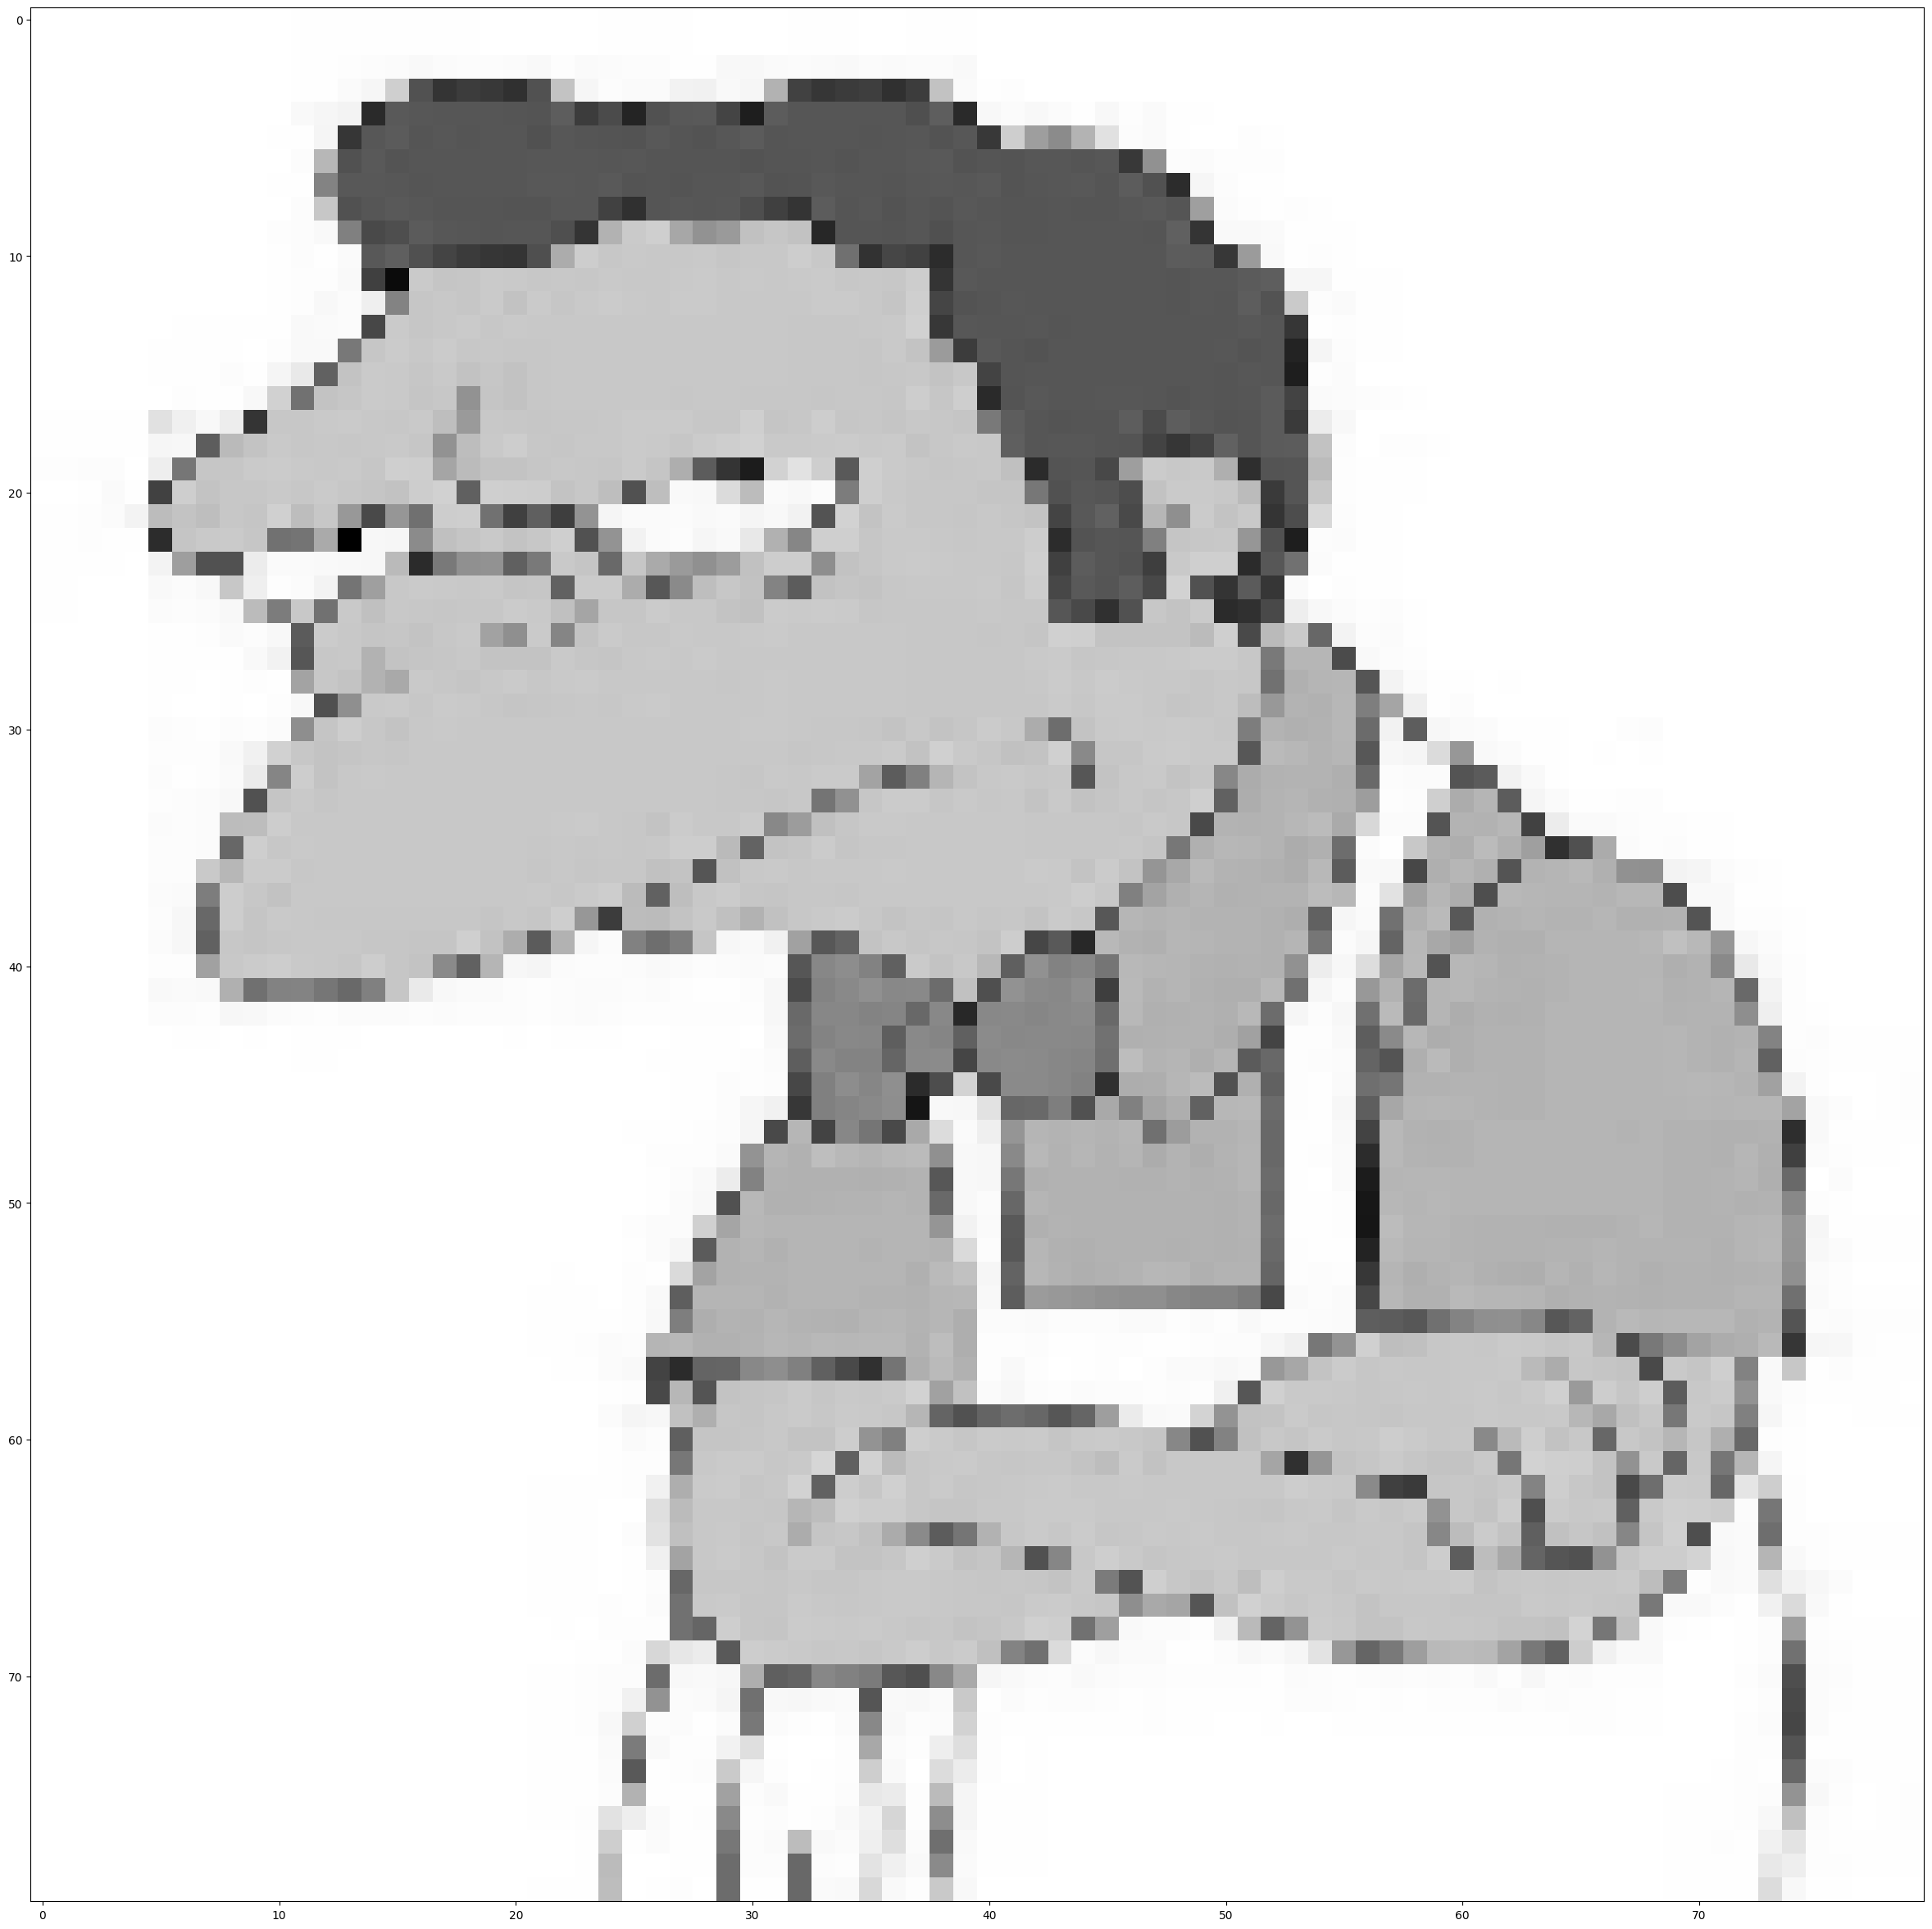

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0],cmap='gray')
plt.show()
# we are not using openCV, bcz it doesn't work smooth in jupyter notebook

In [39]:
# as we can see the image is preprocessed fully, channels =1, img_size, etc.

In [40]:
# seperate the training dataset into features and labels :
featureSet, labels = caer.sep_train(train,IMG_SIZE=IMG_SIZE)
featureSet

array([[[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        ...,

        [[255],
         [255],
         [255],
         ...,
         [254],
         [254],
         [254]],

        [[255],
         [255],
         [255],
         ...,
         [254],
         [254],
         [254]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]]],


       [[[ 99],
         [ 99],
         [103],
         ...,
         [128],
         [123],
         [123]],

        [[103],
         [103],
         [103],
         ...,
         [128],
         [123],
         [123]],

        [[103],
         [103],
         [103],
         ...,
         [128],
         [

In [41]:
# normalize the featureSet to be in range of (0,1):
# it's done to speed up the process
featureSet = caer.normalize(featureSet)

# now, we have to hot-encode the labels from integers to binary class vectors: 
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, len(characters))
# it's done to transform the strings to vectors to feed it the neural net so that deep learning model will work on this with neural nets
# vector's size will be same s len(characters)

In [42]:
# doing training and testing : 
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet,labels,val_ratio=.2)

In [43]:
# deleting unnecessary variables : 
del train
del featureSet
del labels
gc.collect()

0

In [44]:
BATCH_SIZE = 32
EPOCHS = 10

In [45]:
# image data generator :
# synthesize new images with old images to make our net to perform better
# it'll automatic modify our training images(rotate,brightness,etc.) to create more diverse training data
# it'll be done in a batch of size = BATCH_SIZE
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size = BATCH_SIZE)

In [50]:
# creating the model : 
'''"01 python basics.py"model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim = len(characters), loss='binary_crossentropy',decay = 1e-6, learning_rate=1, momentum=0.9, nesterov=True)
'''
# this method become old now so not working 
# so making a model from scratch keras 

'"01 python basics.py"model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim = len(characters), loss=\'binary_crossentropy\',decay = 1e-6, learning_rate=1, momentum=0.9, nesterov=True)\n'

In [67]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [54]:
w,h = IMG_SIZE[:2]
output_dim = 10

In [55]:
# complete model : 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(w, h,channels)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu')) 
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))

# Output Layer
model.add(Dense(output_dim, activation='softmax'))


C:\Users\rachi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 80, 80, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 78, 78, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 18, 18, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,591,274 (67.11 MB)

 Trainable params: 17,591,274 (67.11 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
optimizer = SGD(learning_rate=0.001, weight_decay=1e-7, momentum=0.9, nesterov=True)
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [72]:
!pip install scipy
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------- -------------------------- 20.5/60.8 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.8 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 647.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB 653.6 kB/s eta 0:01:08
   ---------------------------------------- 0.1/44.5 MB 751.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/44.5 MB 722.1 kB/s eta 0:01:02
   ---------------------------------------- 0.2/44.5 MB 756.6 kB/s eta 0:00:59
   ---------------------------------------- 0.2/44.5 MB 737.3 kB/s eta 0:01:01
   ---------------------------------------- 0.2/44.5 MB 765.3 kB/s eta 0:00:58
   

C:\Users\rachi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


345/345 ━━━━━━━━━━━━━━━━━━━━ 199s 568ms/step - accuracy: 0.1453 - loss: 0.3868 - val_accuracy: 0.1538 - val_loss: 0.3326 - learning_rate: 0.0100
Epoch 2/10


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


345/345 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.2500 - loss: 0.3193 - val_accuracy: 0.1538 - val_loss: 0.3327 - learning_rate: 0.0100
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 203s 588ms/step - accuracy: 0.1654 - loss: 0.3234 - val_accuracy: 0.1538 - val_loss: 0.3319 - learning_rate: 0.0100
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.0625 - loss: 0.3270 - val_accuracy: 0.1538 - val_loss: 0.3320 - learning_rate: 0.0100
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 212s 613ms/step - accuracy: 0.1692 - loss: 0.3228 - val_accuracy: 0.1538 - val_loss: 0.3323 - learning_rate: 0.0100
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.1562 - loss: 0.3215 - val_accuracy: 0.1538 - val_loss: 0.3325 - learning_rate: 0.0100
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 189s 547ms/step - accuracy: 0.1663 - loss: 0.3216 - val_accuracy: 0.1896 - val_loss: 0.3235 - learning_rate: 0.0100
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.0938 - loss: 

In [94]:
print(characters)

['homer_simpson', 'ned_flanders', 'moe_szyslak', 'lisa_simpson', 'bart_simpson', 'marge_simpson', 'krusty_the_clown', 'principal_skinner', 'charles_montgomery_burns', 'milhouse_van_houten']


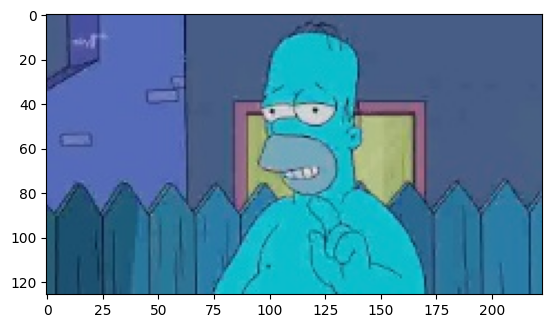

In [98]:
## finally testing time :
test_path = r'D:\00Mine\Python Computer Vision\simpsons_data\kaggle_simpson_testset\kaggle_simpson_testset\homer_simpson_18.jpg'

# reading the test_data :
img = cv.imread(test_path)
plt.imshow(img)
plt.show()
# preprocessing the test_data :
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image


In [99]:
# let's predict it !
predictions = model.predict(prepare(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [100]:
# getting the name of the character with the predictions binary class vector :
print(characters[np.argmax(predictions[0])])

homer_simpson


Yeah! it predicted the correct result.